# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

The aim of the analysis is provideing a descriptive and inferential statistics of the traffic in saudi arabia.

## Executive Summary

In Saudi Arabia, cars are the most widely used transportation. Accordingly, the [general department of traffic in the ministry of interior](https://www.moi.gov.sa/wps/portal/Home/sectors/publicsecurity/traffic/!ut/p/z1/04_iUlDg4tKPAFJABjKBwtGPykssy0xPLMnMz0vM0Y_Qj4wyizfwNDHxMDQx8nZ3CTQ1cAz0dvX3dDE2MnA00vfSj8KvIDg1T78gO1ARAHn-YJg!/) is always striving for making traffic safe by [enhancing the laws](http://live.saudigazette.com.sa/article/164574/New-traffic-laws-in-15-days) and [developing traffic systems](https://www.arabnews.com/node/342925). 
In this project, I analysied 2 datasets:
- [Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets): which contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics.
- [Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period): which contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [2]:
from scipy.stats import skew
from scipy.stats import ttest_ind

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

In [3]:
licenses_df = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv' , delimiter=';')
accidents_df = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv' ,  delimiter=';')

In [4]:
licenses_df = licenses_df.drop( 'Unnamed: 0' , axis=1)
accidents_df = accidents_df.drop([ 'Unnamed: 0.1' , 'Unnamed: 0' ] , axis=1)

In [5]:
licenses_df.head(5)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"


In [6]:
accidents_df.head(5)

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"



|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|*int*|Driving_Licenses/Traffic_Accidents|When does the license issued/ the accidents happen|
|**region**|*object*|Driving_Licenses/Traffic_Accidents|Where does the license issued/ the accidents happen| 
|**driving_liceses**|*int*|Driving_Licenses|The numbers of driving licenses|
|**geo_point_2d**|*object*|Driving_Licenses/Traffic_Accidents|Coordinates of the location| 
|**x**|*float*|Driving_Licenses/Traffic_Accidents|The first element of the location's coordinates| 
|**y**|*float*|Driving_Licenses/Traffic_Accidents|The second element of the location's coordinates|
|**indicator**|*object*|Traffic_Accidents|Type of the accident|
|**value**|*int*|Traffic_Accidents|The number of the accidents|

In [7]:
licenses_df.isna().sum()

Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

In [8]:
accidents_df.isna().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [9]:
# min of  licenses_df
licenses_df.min()

Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

In [10]:
#max of licenses_df
licenses_df.max()

Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object

In [11]:
# min of  accidents_df
accidents_df.min()

Year                   (2016)
Region               Al-Baaha
Indicator    No. of Accidents
Value                   1007n
dtype: object

In [12]:
#max of accidents_df
accidents_df.max()

Year                              (2017)
Region                             Total
Indicator    No. of Casualties - Injured
Value                             99925n
dtype: object

In [13]:
#code
licenses_df.dtypes , accidents_df.dtypes

(Year                   object
 Administritive Area    object
 Driving Liceses        object
 geo_point_2d           object
 dtype: object, Year            object
 Region          object
 Indicator       object
 Value           object
 geo_point_2d    object
 dtype: object)

In [14]:
type(licenses_df.geo_point_2d[0])

str

In [15]:
#filling nul value
accidents_df.geo_point_2d.unique()

array(['21.628962766, 41.2636898334', '23.2883307307, 50.1478302439',
       '27.90165499, 37.2598581394', '27.400845724, 41.4406960508',
       '30.197074783, 41.8171186952', '17.2072313962, 42.6525807422',
       '29.9677445762, 39.5570371172', nan,
       '20.1484058503, 41.4665484892', '23.0814341634, 45.5857512766',
       '24.927534539, 39.4918237173', '26.1967063704, 43.3429998455',
       '18.4511003068, 46.8688495726', '19.1387847401, 42.941470036'],
      dtype=object)

In [16]:
licenses_df["geo_point_2d"].fillna("0 , 0", inplace = True)
accidents_df["geo_point_2d"].fillna("0 , 0", inplace = True)

In [19]:
licenses_df['x'] = licenses_df.apply( lambda x : str(x['geo_point_2d']).split(',',1)[0] ,axis=1)
licenses_df['y'] = licenses_df.apply( lambda x :  str(x['geo_point_2d']).split(',',1)[1] ,axis=1)

licenses_df.head(2)

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [18]:
#code
accidents_df['x'] = accidents_df.apply( lambda x : str(x['geo_point_2d']).split(',',1)[0] ,axis=1)
accidents_df['y'] = accidents_df.apply( lambda x :  str(x['geo_point_2d']).split(',',1)[1] ,axis=1)

accidents_df.head(2)

,Year,Region,Indicator,Value,geo_point_2d,x,y
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439


In [20]:
#converting numerical columns to an appropriate numeric type:

def converting_numerical(column):
    return column.astype(float)

In [21]:
licenses_df['x'] = converting_numerical(licenses_df['x'])
licenses_df['y'] = converting_numerical(licenses_df['y'])

accidents_df['x'] = converting_numerical(accidents_df['x'])
accidents_df['y'] = converting_numerical(accidents_df['y'])

In [22]:
licenses_df['Year'] = licenses_df.apply( lambda x : x[0].replace('(','') ,axis=1)
licenses_df['Year'] = licenses_df.apply( lambda x : x[0].replace(')','') ,axis=1)

accidents_df['Year'] = accidents_df.apply( lambda x : x[0].replace('(','') ,axis=1)
accidents_df['Year'] = accidents_df.apply( lambda x : x[0].replace(')','') ,axis=1)

In [23]:
licenses_df['Year'] = converting_numerical(licenses_df['Year'])
accidents_df['Year'] = converting_numerical(accidents_df['Year'])

In [24]:
accidents_df.info() , licenses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Year            84 non-null float64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    84 non-null object
x               84 non-null float64
y               84 non-null float64
dtypes: float64(3), object(4)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
Year                   350 non-null float64
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           350 non-null object
x                      350 non-null float64
y                      350 non-null float64
dtypes: float64(3), object(3)
memory usage: 16.5+ KB


(None, None)

In [25]:
#Column names should be all lowercase & #Column names should not contain spaces:
licenses_df.columns = [col.replace(' ','_').lower() for col in licenses_df.columns]
accidents_df.columns = [col.replace(' ','_').lower() for col in accidents_df.columns]
#checking
licenses_df.columns  , accidents_df.columns 

(Index(['year', 'administritive_area', 'driving_liceses', 'geo_point_2d', 'x',
        'y'],
       dtype='object'),
 Index(['year', 'region', 'indicator', 'value', 'geo_point_2d', 'x', 'y'], dtype='object'))

In [26]:
#Column names should be unique and informative
licenses_df.rename({'administritive_area': 'region'}, axis='columns', inplace=True)

#checking
licenses_df.columns  , accidents_df.columns 

(Index(['year', 'region', 'driving_liceses', 'geo_point_2d', 'x', 'y'], dtype='object'),
 Index(['year', 'region', 'indicator', 'value', 'geo_point_2d', 'x', 'y'], dtype='object'))

In [27]:
licenses_df['driving_liceses'] = licenses_df.apply( lambda x : str(x['driving_liceses'].replace('n','')) ,axis=1)
licenses_df['driving_liceses'] = converting_numerical(licenses_df['driving_liceses'])

In [28]:
accidents_df['value'] = accidents_df.apply( lambda x : str(x['value'].replace('n','')) ,axis=1)
accidents_df['value'] = converting_numerical(accidents_df['value'])

In [29]:
licenses_df.region.unique() , accidents_df.region.unique()

(array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
        'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
        'Al-Jouf', 'Total', 'Riyadh'], dtype=object),
 array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
        'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
        'Qassim', 'Najran', 'Asir'], dtype=object))

In [31]:
accidents_df = accidents_df.replace({'Qassim': 'Al-Qaseem' , 'Eastern Region' : 'Eastern', 'Al-Baaha' : 'Al-Baha' , 'Asir'  'Assir'})

In [32]:
licenses_df.region.unique() , accidents_df.region.unique()

(array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
        'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
        'Al-Jouf', 'Total', 'Riyadh'], dtype=object),
 array(['Makkah', 'Eastern', 'Tabouk', 'Hail', 'Northern Boarder', 'Jazan',
        'Al-Jouf', 'Total', 'Al-Baha', 'Riyadh', 'Madinah', 'Al-Qaseem',
        'Najran', 'Assir'], dtype=object))

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|*int*|Driving_Licenses/Traffic_Accidents|When does the license issued/ the accidents happen|
|**region**|*object*|Driving_Licenses/Traffic_Accidents|Where does the license issued/ the accidents happen| 
|**driving_liceses**|*int*|Driving_Licenses|The numbers of driving licenses|
|**geo_point_2d**|*object*|Driving_Licenses/Traffic_Accidents|Coordinates of the location| 
|**x**|*float*|Driving_Licenses/Traffic_Accidents|The first element of the location's coordinates| 
|**y**|*float*|Driving_Licenses/Traffic_Accidents|The second element of the location's coordinates|
|**indicator**|*object*|Traffic_Accidents|Type of the accident|
|**value**|*int*|Traffic_Accidents|The number of the accidents|

In [33]:
licenses_df =licenses_df[licenses_df.region != 'Total']
accidents_df =accidents_df[accidents_df.region != 'Total']

#checking
licenses_df.region.unique() , accidents_df.region.unique()

(array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
        'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
        'Al-Jouf', 'Riyadh'], dtype=object),
 array(['Makkah', 'Eastern', 'Tabouk', 'Hail', 'Northern Boarder', 'Jazan',
        'Al-Jouf', 'Al-Baha', 'Riyadh', 'Madinah', 'Al-Qaseem', 'Najran',
        'Assir'], dtype=object))

In [34]:
licenses_df.head(2)

,year,region,driving_liceses,geo_point_2d,x,y
0,2012.0,Makkah,143954.0,"21.628962766, 41.2636898334",21.628963,41.26369
1,1994.0,Makkah,75349.0,"21.628962766, 41.2636898334",21.628963,41.26369


In [35]:
accidents_df.head(2)

,year,region,indicator,value,geo_point_2d,x,y
0,2016.0,Makkah,No. of Casualties - Injured,12383.0,"21.628962766, 41.2636898334",21.628963,41.26369
1,2016.0,Eastern,No. of Casualties - Dead,1113.0,"23.2883307307, 50.1478302439",23.288331,50.14783


License data is in wide format.

Accident data is in long format because there is (value) column. Also, it seems in (indicator) there are duplicates variables.

I will convert Accident data to wide inorder to merge it with License data.

In [37]:
accidents_df.shape

(78, 7)

In [38]:
#wide format of accidents_df
wide_accidents_df = pd.pivot_table(accidents_df, columns=['indicator'], values='value', index=['year','region', 'geo_point_2d' , 'x' , 'y'],
                                   fill_value=np.nan)
wide_accidents_df.head(2)

indicator                                                        No. of Accidents  \
year   region  geo_point_2d                 x         y                             
2016.0 Al-Baha 20.1484058503, 41.4665484892 20.148406 41.466548              3618   
       Al-Jouf 29.9677445762, 39.5570371172 29.967745 39.557037             10212   

indicator                                                        No. of Casualties - Dead  \
year   region  geo_point_2d                 x         y                                     
2016.0 Al-Baha 20.1484058503, 41.4665484892 20.148406 41.466548                       185   
       Al-Jouf 29.9677445762, 39.5570371172 29.967745 39.557037                       245   

indicator                                                        No. of Casualties - Injured  
year   region  geo_point_2d                 x         y                                       
2016.0 Al-Baha 20.1484058503, 41.4665484892 20.148406 41.466548                         1227  
       Al-Jouf 29.9677445762, 39.5570371172 29.967745 39.557037                          920

In [39]:
wide_accidents_df.reset_index(inplace=True)

In [41]:
wide_accidents_df['No. of Accidents'] = converting_numerical(wide_accidents_df['No. of Accidents'])
wide_accidents_df['No. of Casualties - Dead'] = converting_numerical(wide_accidents_df['No. of Casualties - Dead'])
wide_accidents_df['No. of Casualties - Injured'] = converting_numerical(wide_accidents_df['No. of Casualties - Injured'])

In [44]:
wide_merged_inner = licenses_df.merge(wide_accidents_df, on=['year','region'] , how='inner')
wide_merged = licenses_df.merge(wide_accidents_df, on=['year','region'] , how='outer')
#checking
wide_merged.head(3)

,year,region,driving_liceses,geo_point_2d_x,x_x,y_x,geo_point_2d_y,x_y,y_y,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2012.0,Makkah,143954.0,"21.628962766, 41.2636898334",21.628963,41.26369,NaN,NaN,NaN,NaN,NaN,NaN
1,1994.0,Makkah,75349.0,"21.628962766, 41.2636898334",21.628963,41.26369,NaN,NaN,NaN,NaN,NaN,NaN
2,1998.0,Makkah,86082.0,"21.628962766, 41.2636898334",21.628963,41.26369,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#renaming columns:
wide_merged_inner.rename({'x_x': 'x_licenses' , 'y_x': 'y_licenses', 'x_y': 'x_accidents' , 'y_y': 'y_accidents' ,
                          'geo_point_2d_x' : 'geo_point_2d_licenses' , 'geo_point_2d_y' : 'geo_point_2d_accidents'}, axis='columns', inplace=True)

#renaming columns:
wide_merged.rename({'x_x': 'x_licenses' , 'y_x': 'y_licenses', 'x_y': 'x_accidents' , 'y_y': 'y_accidents' ,
                          'geo_point_2d_x' : 'geo_point_2d_licenses' , 'geo_point_2d_y' : 'geo_point_2d_accidents'}, axis='columns', inplace=True)

In [52]:
wide_merged.fillna(0, inplace=True)

In [53]:
wide_merged.head()

,year,region,driving_liceses,geo_point_2d_licenses,x_licenses,y_licenses,geo_point_2d_accidents,x_accidents,y_accidents,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2012.0,Makkah,143954.0,"21.628962766, 41.2636898334",21.628963,41.26369,0,0.0,0.0,0.0,0.0,0.0
1,1994.0,Makkah,75349.0,"21.628962766, 41.2636898334",21.628963,41.26369,0,0.0,0.0,0.0,0.0,0.0
2,1998.0,Makkah,86082.0,"21.628962766, 41.2636898334",21.628963,41.26369,0,0.0,0.0,0.0,0.0,0.0
3,2004.0,Makkah,86636.0,"21.628962766, 41.2636898334",21.628963,41.26369,0,0.0,0.0,0.0,0.0,0.0
4,2005.0,Makkah,65099.0,"21.628962766, 41.2636898334",21.628963,41.26369,0,0.0,0.0,0.0,0.0,0.0


In [54]:
wide_merged.to_csv('combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics

In [55]:
wide_merged_inner.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.000000,2016.000000,2016.500000,2017.000000,2017.000000
driving_liceses,26.0,62507.000000,107293.917762,2153.000000,8363.250000,16085.000000,51222.000000,495307.000000
x_licenses,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075
y_licenses,26.0,42.602789,3.313532,37.259858,41.263690,41.817119,43.343000,50.147830
x_accidents,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075
y_accidents,26.0,42.602789,3.313532,37.259858,41.263690,41.817119,43.343000,50.147830
No. of Accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
No. of Casualties - Dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
No. of Casualties - Injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [56]:
def standard_deviation(column):
    mean = sum(column) / len(column)
    var  = sum( (pow(int(x)-mean,2) for x in column) ) / len(column)
    return np.sqrt(var)

In [57]:
sd = { coulmn_name : standard_deviation( wide_merged_inner[coulmn_name] ) 
      for coulmn_name in wide_merged_inner.columns
      if isinstance(wide_merged_inner[coulmn_name][0] , float) }

In [58]:
sd 

{'year': 0.5,
 'driving_liceses': 105210.34237659337,
 'x_licenses': 4.089707967410347,
 'y_licenses': 3.28771639372548,
 'x_accidents': 4.089707967410347,
 'y_accidents': 3.28771639372548,
 'No. of Accidents': 45590.82869880505,
 'No. of Casualties - Dead': 539.1069593406002,
 'No. of Casualties - Injured': 2865.885411322023}

#### Investigating trends in the data

From the table below I investigate:
- Makkah, Riyadh, and Eastern are the highest Driving Licenses based on years (1993 - 2017)
- Najran, Al-Baha, and Northern Boarder are the lowest Driving Licenses based on years (1993 - 2017)

In [61]:
wide_merged.loc[(wide_merged['year'] >= 1993) & (wide_merged['year'] <= 2017)][['region' , 'driving_liceses']].groupby(['region']
                                                                                                                      ).sum().sort_values(by=['driving_liceses'], ascending=False)

,driving_liceses
region,
Makkah,2433659.0
Riyadh,2243304.0
Eastern,2147243.0
Al-Qaseem,562292.0
Assir,490615.0
Madinah,349084.0
Hail,257782.0
Jazan,214066.0
Tabouk,203849.0


From the table below I investigate: 
- Makkah, Riyadh, and Eastern are the highest mean Traffic Accidents numbers for years (2016 - 2017)
- Hail, Najran, and Al-Baha are the lowest mean Traffic Accidents numbers for years (2016 - 2017)

In [62]:
wide_merged.loc[(wide_merged['year'] >= 2016) & (wide_merged['year'] <= 2017)][['region' , 'No. of Accidents']].groupby(['region']
                                                                                                                      ).mean().sort_values(by=['No. of Accidents'], ascending=False)

,No. of Accidents
region,
Makkah,140189.5
Riyadh,120830.5
Eastern,91526.0
Assir,28964.5
Al-Qaseem,24034.5
Jazan,24017.0
Madinah,15272.5
Tabouk,13872.0
Northern Boarder,12368.0


geo point that have the most accidents numbers:

In [67]:
wide_merged[['geo_point_2d_accidents', 'No. of Accidents' , 'region']].groupby(['geo_point_2d_accidents' , 
                                                                            'region']).sum().reset_index().sort_values(by=['No. of Accidents'], ascending=False).head(2)

,geo_point_2d_accidents,region,No. of Accidents
17,"21.628962766, 41.2636898334",Makkah,280379.0
18,"23.0814341634, 45.5857512766",Riyadh,241661.0


## Visualize the data

In [76]:
import random
colors = ['lightseagreen' , 'teal' , 'skyblue' , 'lightblue' , 'cadetblue']
#I will use these colors in visualization below.

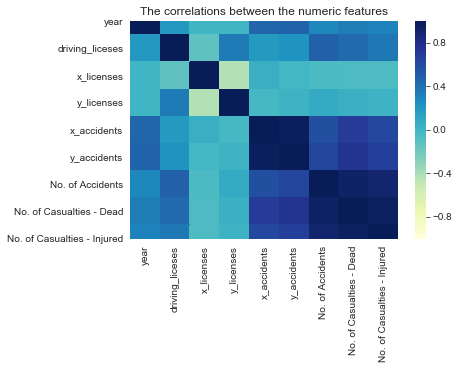

In [72]:
ax = plt.axes()
sns.heatmap(wide_merged.corr() , cmap="YlGnBu" , ax=ax, vmin=-1)
ax.set_title('The correlations between the numeric features')
plt.show()

In [73]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig , ax = plt.subplots(nrows=nrows , ncols=2 , figsize=(15,5))    # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column] , bins=15 , color = random.choice(colors) ) # feel free to add more settings
        ax[i].set_title(column)
        # Set titles, labels, etc here for each subplot

In [74]:
#checking
#subplot_histograms(wide_merged , ['year' , 'driving_liceses'] ,  ['year', 'driving_liceses'] ,  ['year' , 'driving_liceses'])

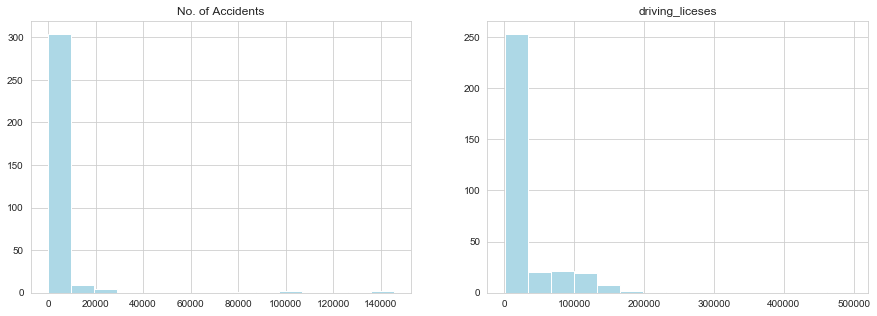

In [77]:
# Code
subplot_histograms(wide_merged , ['No. of Accidents' , 'driving_liceses'] ,  ['No. of Accidents', 'driving_liceses'] ,
                   ['No. of Accidents' , 'driving_liceses'])

Driving Licenses vs. Traffic Accidents for 2017

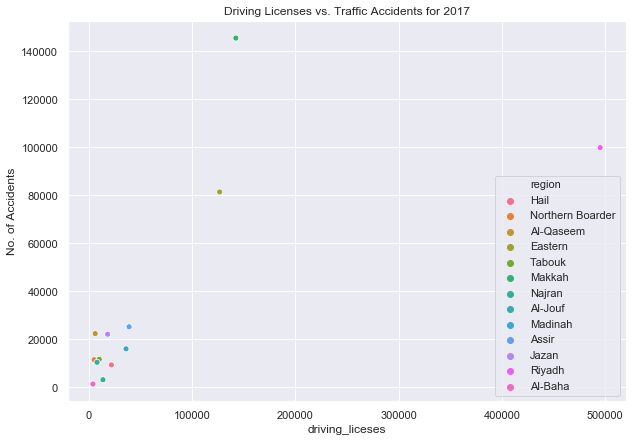

In [79]:
#Seaborn 
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.scatterplot(x ='driving_liceses' , y='No. of Accidents' , data= wide_merged.loc[ (wide_merged['year'] == 2017)] , hue='region')
ax.legend(loc="lower right")
ax.set_title("Driving Licenses vs. Traffic Accidents for 2017");

Driving Licenses vs. Traffic Accidents for 2016

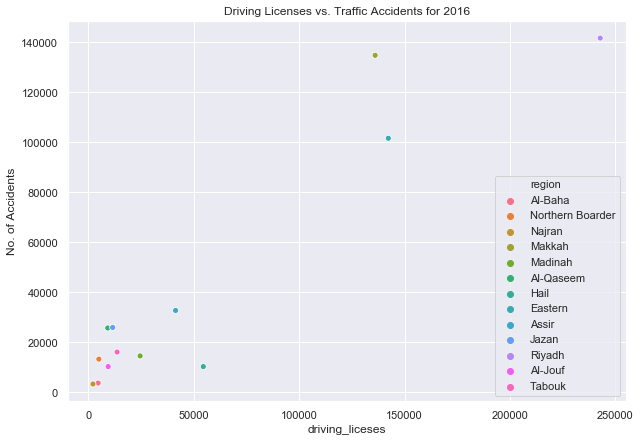

In [80]:
ax = sns.scatterplot(x ='driving_liceses' , y='No. of Accidents' , data= wide_merged.loc[ (wide_merged['year'] == 2016)] , hue='region')
ax.legend(loc="lower right")
ax.set_title("Driving Licenses vs. Traffic Accidents for 2016");

Driving Licenses for 2016 vs 2017

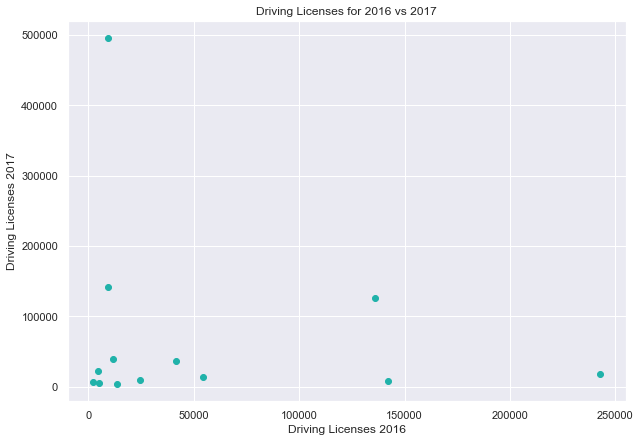

In [81]:
plt.scatter(wide_merged.loc[ (wide_merged['year'] == 2016)]['driving_liceses'] ,
            wide_merged.loc[(wide_merged['year'] == 2017)]['driving_liceses'], c=  random.choice(colors) )
plt.title('Driving Licenses for 2016 vs 2017')
plt.xlabel('Driving Licenses 2016')
plt.ylabel('Driving Licenses 2017');

Traffic Accidents for 2016 vs 2017

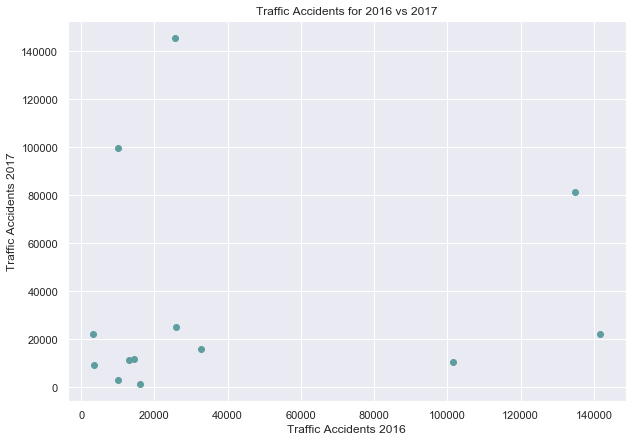

In [83]:
plt.scatter(wide_merged.loc[ (wide_merged['year'] == 2016)]['No. of Accidents'] ,
                            wide_merged.loc[ (wide_merged['year'] == 2017)]['No. of Accidents'], c=  random.choice(colors) )
plt.title('Traffic Accidents for 2016 vs 2017')
plt.xlabel('Traffic Accidents 2016')
plt.ylabel('Traffic Accidents 2017');

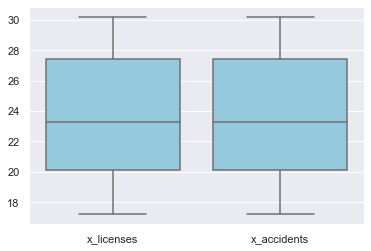

In [93]:
sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(data=wide_merged_inner[['x_licenses' , 'x_accidents' ]] , color = random.choice(colors) );
#It seems there are no outliers

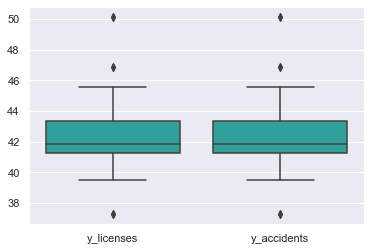

In [94]:
Y = wide_merged_inner[[ 'y_licenses' , 'y_accidents'  ]]
sns.boxplot(data=Y , color = random.choice(colors));
#It seems there are outliers.

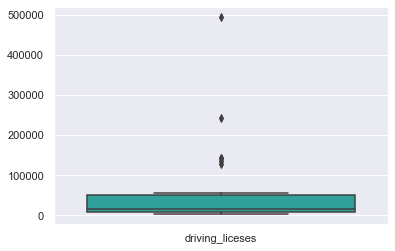

In [95]:
column = wide_merged_inner[['driving_liceses']]
sns.boxplot(data=column , color = random.choice(colors));
#It seems there are outliers.

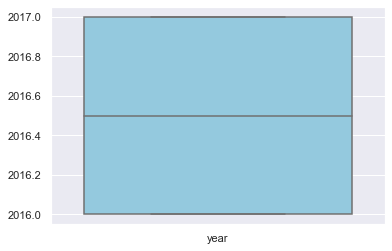

In [96]:
column = wide_merged_inner[['year']]
sns.boxplot(data=column, color = random.choice(colors));
#It seems there are no outliers.

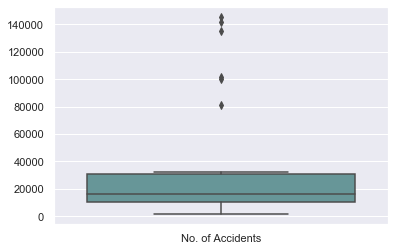

In [97]:
column = wide_merged_inner[['No. of Accidents']]
sns.boxplot(data=column, color = random.choice(colors));
#It seems there are outliers.

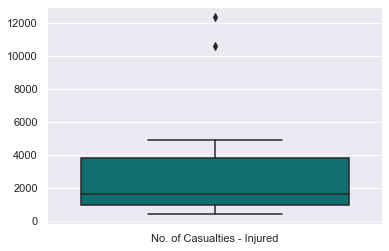

In [98]:
column = wide_merged_inner[['No. of Casualties - Injured']]
sns.boxplot(data=column, color = random.choice(colors));
#It seems there are outliers.

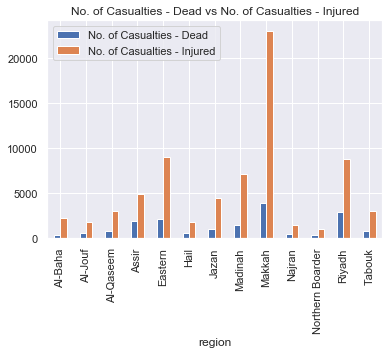

In [102]:
wide_merged[['region' , 'No. of Casualties - Dead' , 'No. of Casualties - Injured']].groupby(['region']).sum().plot(
    kind="bar", title='No. of Casualties - Dead vs No. of Casualties - Injured');

## Descriptive and Inferential Statistics

#### Summarizing Distributions

In [103]:
#central tendency mean, median, mode:
wide_merged_inner.mean()

year                            2016.500000
driving_liceses                62507.000000
x_licenses                        23.810447
y_licenses                        42.602789
x_accidents                       23.810447
y_accidents                       42.602789
No. of Accidents               38225.692308
No. of Casualties - Dead         635.384615
No. of Casualties - Injured     2743.038462
dtype: float64

In [104]:
wide_merged_inner.median()

year                            2016.500000
driving_liceses                16085.000000
x_licenses                        23.288331
y_licenses                        41.817119
x_accidents                       23.288331
y_accidents                       41.817119
No. of Accidents               16050.500000
No. of Casualties - Dead         415.500000
No. of Casualties - Injured     1618.500000
dtype: float64

In [105]:
wide_merged_inner.mode().head(2)

,year,region,driving_liceses,geo_point_2d_licenses,x_licenses,y_licenses,geo_point_2d_accidents,x_accidents,y_accidents,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016.0,Al-Baha,2153.0,"17.2072313962, 42.6525807422",17.207231,37.259858,"17.2072313962, 42.6525807422",17.207231,37.259858,1414.0,112.0,374.0
1,2017.0,Al-Jouf,4131.0,"18.4511003068, 46.8688495726",18.451100,39.491824,"18.4511003068, 46.8688495726",18.451100,39.491824,3193.0,134.0,631.0


In [106]:
#spread: IQR, Variance, and Standard Deviation:
#IQR
for column in wide_merged_inner.columns:
    if isinstance(wide_merged[column][0] , float):
        q1 = wide_merged_inner[column].quantile(.25)
        q3 = wide_merged_inner[column].quantile(.75)
        print ('the values of column {} should be between {} and {} if we increase / decrease it by {}'.format(column , q1 , q3 , q3 - q1))
        mask = wide_merged_inner[column].between(q1, q3, inclusive=True)
        without_outlier = wide_merged_inner.loc[mask]

the values of column year should be between 2016.0 and 2017.0 if we increase / decrease it by 1.0
the values of column driving_liceses should be between 8363.25 and 51222.0 if we increase / decrease it by 42858.75
the values of column x_licenses should be between 20.1484058503 and 27.400845724 if we increase / decrease it by 7.252439873699998
the values of column y_licenses should be between 41.2636898334 and 43.3429998455 if we increase / decrease it by 2.0793100121000023
the values of column x_accidents should be between 20.1484058503 and 27.400845724 if we increase / decrease it by 7.252439873699998
the values of column y_accidents should be between 41.2636898334 and 43.3429998455 if we increase / decrease it by 2.0793100121000023
the values of column No. of Accidents should be between 10276.25 and 30981.25 if we increase / decrease it by 20705.0
the values of column No. of Casualties - Dead should be between 241.25 and 929.25 if we increase / decrease it by 688.0
the values of colu

In [107]:
wide_merged_inner.var()

year                           2.600000e-01
driving_liceses                1.151198e+10
x_licenses                     1.827163e+01
y_licenses                     1.097949e+01
x_accidents                    1.827163e+01
y_accidents                    1.097949e+01
No. of Accidents               2.161665e+09
No. of Casualties - Dead       3.022618e+05
No. of Casualties - Injured    8.541831e+06
dtype: float64

In [108]:
wide_merged_inner.std()

year                                0.509902
driving_liceses                107293.917762
x_licenses                          4.274533
y_licenses                          3.313532
x_accidents                         4.274533
y_accidents                         3.313532
No. of Accidents                46493.705035
No. of Casualties - Dead          549.783381
No. of Casualties - Injured      2922.641127
dtype: float64

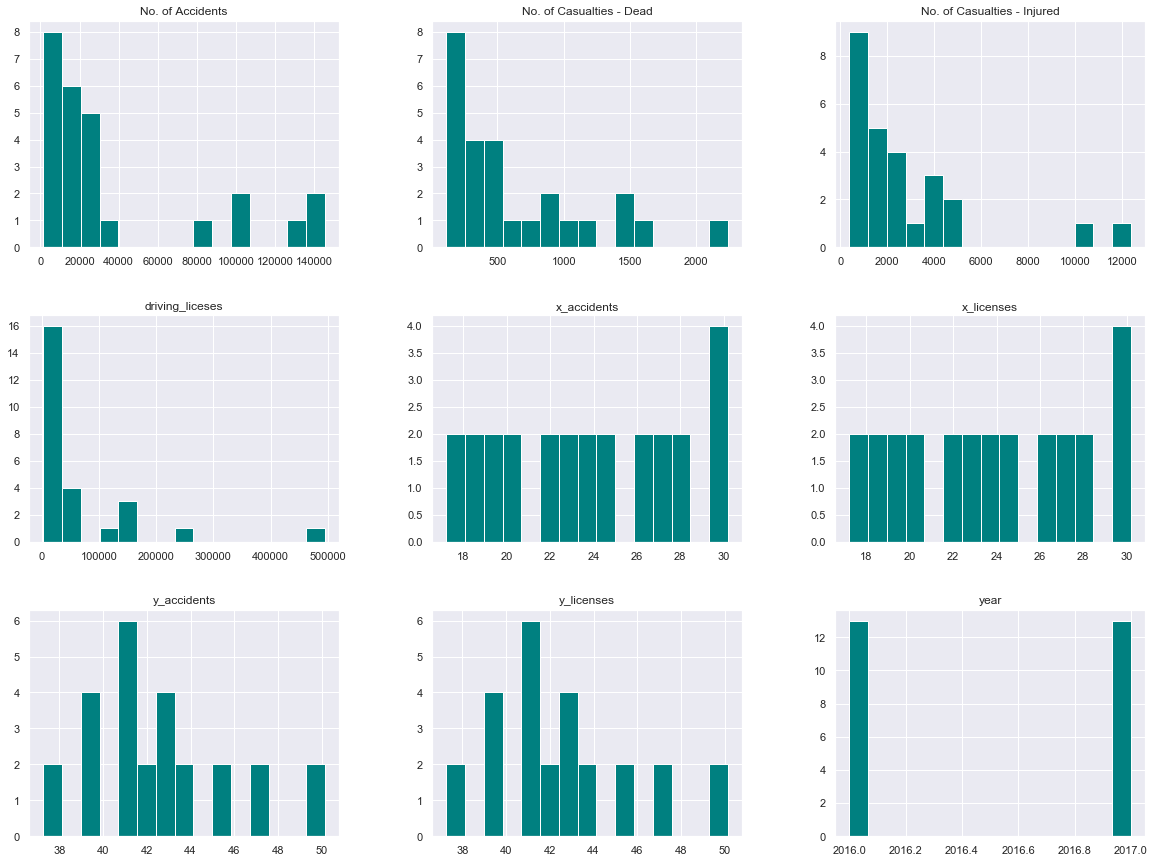

In [109]:
#skeweness
wide_merged_inner.hist( figsize = (20,15) , bins = 15 , color=random.choice(colors));

In [110]:
for column in wide_merged_inner.columns:
    if isinstance(wide_merged_inner[column][0] , float):
        if wide_merged_inner[column].mean() < wide_merged_inner[column].median():
            print ('Since {} is less than {}, {} is left skewed'.
                   format(wide_merged_inner[column].mean() , wide_merged_inner[column].median() ,  column))
        elif wide_merged_inner[column].mean() > wide_merged_inner[column].median():
            print ('Since {} is greater than {}, {} is right skewed'.
                   format(wide_merged_inner[column].mean() , wide_merged_inner[column].median() ,  column))
        elif wide_merged_inner[column].mean() == wide_merged_inner[column].median():
            print ('Since {} is equal to {}, {} is normally distributed'.
                   format(wide_merged_inner[column].mean() , wide_merged_inner[column].median() ,  column))

Since 2016.5 is equal to 2016.5, year is normally distributed
Since 62507.0 is greater than 16085.0, driving_liceses is right skewed
Since 23.810446995084614 is greater than 23.2883307307, x_licenses is right skewed
Since 42.60278875071539 is greater than 41.8171186952, y_licenses is right skewed
Since 23.810446995084614 is greater than 23.2883307307, x_accidents is right skewed
Since 42.60278875071539 is greater than 41.8171186952, y_accidents is right skewed
Since 38225.692307692305 is greater than 16050.5, No. of Accidents is right skewed
Since 635.3846153846154 is greater than 415.5, No. of Casualties - Dead is right skewed
Since 2743.0384615384614 is greater than 1618.5, No. of Casualties - Injured is right skewed


In [111]:
for column in wide_merged_inner.columns:
    if isinstance(wide_merged_inner[column][0] , float):
        if skew(wide_merged_inner[column]) > 0:
            print ('Since the skewness is greater than 0, {} is right skewed'.format(column))
        elif skew(wide_merged_inner[column]) < 0:
            print ('Since the skewness is less than 0, {} is left skewed'.format(column))
        elif skew(wide_merged_inner[column]) == 0:
            print ('Since the skewness is equal to 0, {} is normally skewed'.format(column))

Since the skewness is equal to 0, year is normally skewed
Since the skewness is greater than 0, driving_liceses is right skewed
Since the skewness is greater than 0, x_licenses is right skewed
Since the skewness is greater than 0, y_licenses is right skewed
Since the skewness is greater than 0, x_accidents is right skewed
Since the skewness is greater than 0, y_accidents is right skewed
Since the skewness is greater than 0, No. of Accidents is right skewed
Since the skewness is greater than 0, No. of Casualties - Dead is right skewed
Since the skewness is greater than 0, No. of Casualties - Injured is right skewed


## Conclusions and Recommendations

Conclusions:
- There is a relation between the number of driving licences and the number of accidents.
- Big regions have more accidents.
- Number of Injured is less than number of dead in all regions.

Recommendations:
- Add (Age) to see if there is relation between the age of people and the number of accidents.
- Add (gender). It might be helpful in behavioral studies.
- Add (date) to see in which month the accidents have been more.
- Add (type of injury). Is the injury can be cured?
- Add (type of violation) speed exceed or others.

Saher traffic system applied in 2010. We can measure how efficient it is by analyzing the data before and after this system.